# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)
#librerias adicionales:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

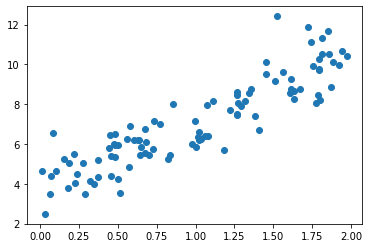

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

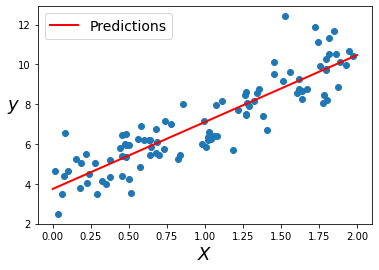

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

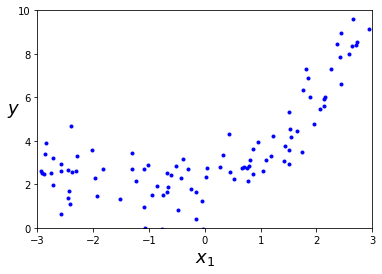

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

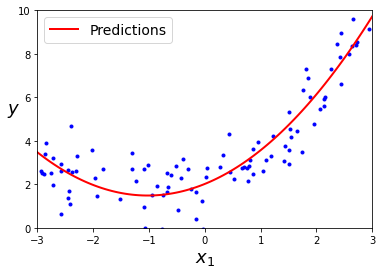

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

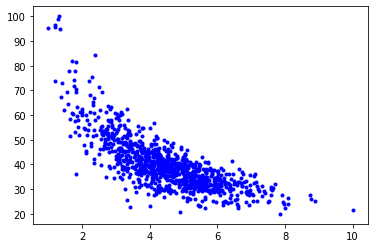

In [ ]:
plt.plot(X,y,'b.')

In [ ]:
#Divide los datos del costo de manufactura. Utiliza la función train_test_split
Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=0.20,random_state=0)
#Imprimimos el tamaño de test y train:
print(Xtv.shape, Xtest.shape, ytv.shape, ytest.shape)

(800, 1) (200, 1) (800,) (200,)


In [ ]:
#lineal
#Realiza la regresión lineal: modelo generado (ecuación)
modelo = LinearRegression(fit_intercept=True)
modelo.fit(Xtv, ytv)


#print("Model slope:    ", modelo.coef_[0])
#print("Model intercept:", modelo.intercept_)

print("La ecuación del modelo es: y=",modelo.coef_[0],"X+",modelo.intercept_)



La ecuación del modelo es: y= -6.123962526222854 X+ 67.51699929483895


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


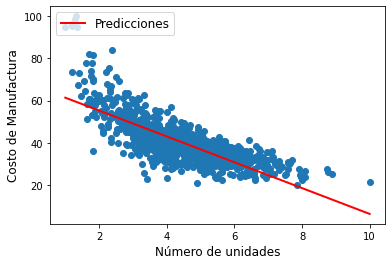

In [ ]:
#su visualización:
X_fit = np.linspace(1, 10, 100)
y_fit = modelo.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predicciones")
plt.xlabel('Número de unidades', fontsize=12)
plt.ylabel('Costo de Manufactura', fontsize=12)
plt.legend(loc="upper left", fontsize=12);

In [ ]:
#sus errores y r cuadrada.
y_pred=modelo.predict(Xtest)
resultados={}
resultados['LR lineal']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

print('\n Error Medio Absoluto (MAE):', resultados['LR lineal'][0])
print('\n Root Mean Squared Error(RMSE):', resultados['LR lineal'][1])
print('\n r2_score:',resultados ['LR lineal'][2])



 Error Medio Absoluto (MAE): 4.8901661963170975

 Root Mean Squared Error(RMSE): 7.023460530219433

 r2_score: 0.5526895076238993


In [ ]:
#polinomial
#Realiza la regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(Xtv)

modelo.fit(X_poly, ytv)



LinearRegression()

In [ ]:

print("La ecuación del modelo es: y=",modelo.coef_[0],"X + ",modelo.intercept_)

La ecuación del modelo es: y= -17.353778088306495 X +  90.69281709517362


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


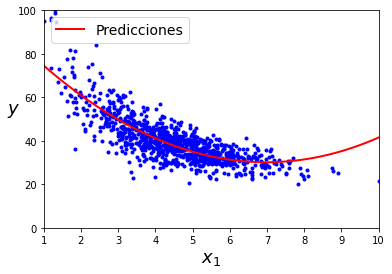

In [ ]:
#su visualización,
X_new=np.linspace(1, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = modelo.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1, 10, 0, 100]);

In [ ]:
#sus errores y r cuadrada.

X_polytest = poly_features.fit_transform(Xtest)
y_pred=modelo.predict(X_polytest)
resultados['LR polinomial']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

print('\nError Medio Absoluto (MAE):', resultados['LR polinomial'][0])
print('\nRoot Mean Squared Error(RMSE):', resultados['LR polinomial'][1])
print('\nr2_score:',resultados ['LR polinomial'][2])



Error Medio Absoluto (MAE): 4.49947773677016

Root Mean Squared Error(RMSE): 6.14594886001069

r2_score: 0.6574809920822378


In [ ]:
#REGRESIÓN POLINOMIAL

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(Xtv)

print("La ecuación del modelo es: y=",modelo.coef_[0],"X +",modelo.coef_[1],"X2+",modelo.intercept_)


La ecuación del modelo es: y= -17.353778088306495 X + 1.2434511496285978 X2+ 90.69281709517362


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


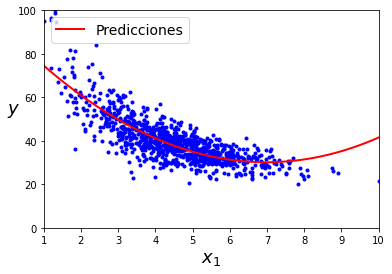

In [ ]:
X_new=np.linspace(1, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = modelo.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1, 10, 0, 100]);


In [ ]:
X_polytest = poly_features.fit_transform(Xtest)
y_pred=modelo.predict(X_polytest)
resultados['LR polinomial']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]


In [ ]:
print('\nError Medio Absoluto (MAE):', resultados['LR polinomial'][0])
print('\nRoot Mean Squared Error(RMSE):', resultados['LR polinomial'][1])
print('\n r2:',resultados ['LR polinomial'][2])


Error Medio Absoluto (MAE): 4.49947773677016

Root Mean Squared Error(RMSE): 6.14594886001069

 r2: 0.6574809920822378


Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [ ]:
modelo = Ridge(alpha=1)
modelo.fit(Xtv, ytv)

print("La ecuación del modelo es: y=",modelo.coef_[0],"X + ",modelo.intercept_)

La ecuación del modelo es: y= -6.119581603391903 X +  67.49755921641744


In [ ]:
X.shape
y.shape

(1000,)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


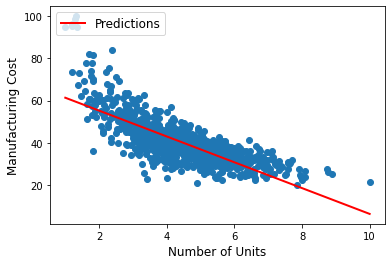

In [ ]:
X_fit = np.linspace(1, 10, 100)
y_fit = modelo.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel('Number of Units', fontsize=12)
plt.ylabel('Manufacturing Cost', fontsize=12)
plt.legend(loc="upper left", fontsize=12);

In [ ]:
y_pred=modelo.predict(Xtest)

resultados['Lasso Lineal']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

print('   Error Medio Absoluto (MAE):', resultados['Lasso Lineal'][0])
print('Root Mean Squared Error(RMSE):', resultados['Lasso Lineal'][1])
print('                     r2_score:',resultados ['Lasso Lineal'][2])

   Error Medio Absoluto (MAE): 4.888986436763052
Root Mean Squared Error(RMSE): 7.022967198991941
                     r2_score: 0.5527523440229261


In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(Xtv)
modelo = Lasso(alpha=0.01)
modelo.fit(X_poly, ytv)

Lasso(alpha=0.01)

In [ ]:
print("La ecuación del modelo es: y=",modelo.coef_[0],"X + ",modelo.coef_[1])

La ecuación del modelo es: y= -17.19081995380919 X +  1.2260566061689468


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


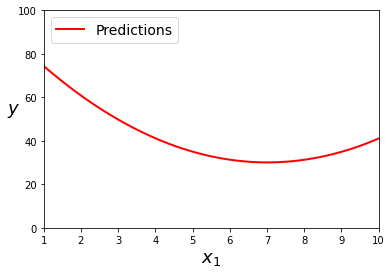

In [ ]:
X_new=np.linspace(1, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = modelo.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1, 10, 0, 100]);

In [ ]:
X_polytest = poly_features.fit_transform(Xtest)
y_pred=modelo.predict(X_polytest)
resultados['Lasso polinomial']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]
print('\n Error Medio Absoluto (MAE):', resultados['Lasso polinomial'][0])
print('\n Root Mean Squared Error(RMSE):', resultados['Lasso polinomial'][1])
print('\n r2 :',resultados ['Lasso polinomial'][2])



 Error Medio Absoluto (MAE): 4.491243025976135

 Root Mean Squared Error(RMSE): 6.1397276953637165

 r2 : 0.6581740628248847


In [ ]:
resultados

{'LR lineal': [4.8901661963170975, 7.023460530219433, 0.5526895076238993],
 'LR polinomial': [4.49947773677016, 6.14594886001069, 0.6574809920822378],
 'Lasso Lineal': [4.888986436763052, 7.022967198991941, 0.5527523440229261],
 'Lasso polinomial': [4.491243025976135,
  6.1397276953637165,
  0.6581740628248847]}

In [ ]:
modelos=resultados.keys()
modelos


dict_keys(['LR lineal', 'LR polinomial', 'Lasso Lineal', 'Lasso polinomial'])

MAE de  LR lineal   4.8901661963170975
MAE de  LR polinomial   4.49947773677016
MAE de  Lasso Lineal   4.888986436763052
MAE de  Lasso polinomial   4.491243025976135


Text(0.5, 1.0, 'MAE')

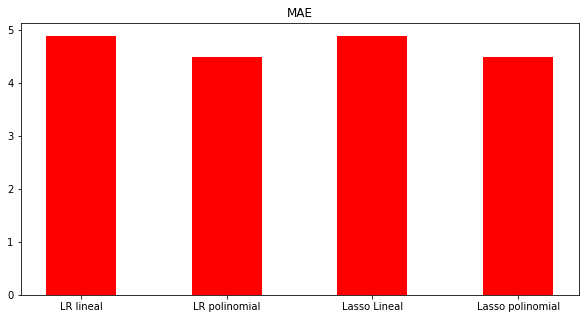

In [ ]:
##Gráfica MAE ( de los 4 métodos y R2 de los 4 métodos:

mae_value = list()
for modelo in modelos:
  mae_value.append(resultados[modelo][0])
  print('MAE de ',modelo," ",resultados[modelo][0])

plt.figure(figsize = (10, 5))
plt.bar(modelos, mae_value, color ='red', width = 0.48)
plt.title("MAE")


RMSE de  LR lineal   7.023460530219433
RMSE de  LR polinomial   6.14594886001069
RMSE de  Lasso Lineal   7.022967198991941
RMSE de  Lasso polinomial   6.1397276953637165


Text(0.5, 1.0, 'RMSE')

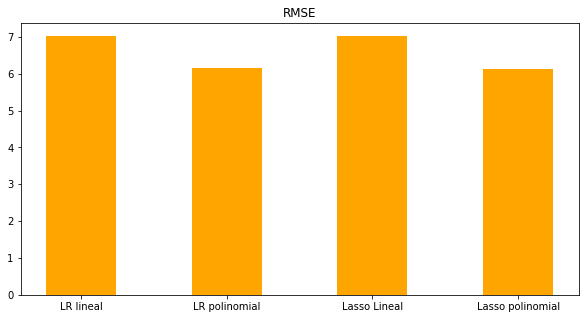

In [ ]:
rmse_value = list()
for modelo in modelos:
  rmse_value.append(resultados[modelo][1])
  print('RMSE de ',modelo," ",resultados[modelo][1])

plt.figure(figsize = (10, 5))
plt.bar(modelos, rmse_value, color ='orange', width = 0.48)
plt.title("RMSE")


r2_sccore de  LR lineal   0.5526895076238993
r2_sccore de  LR polinomial   0.6574809920822378
r2_sccore de  Lasso Lineal   0.5527523440229261
r2_sccore de  Lasso polinomial   0.6581740628248847


Text(0.5, 1.0, 'r2_score')

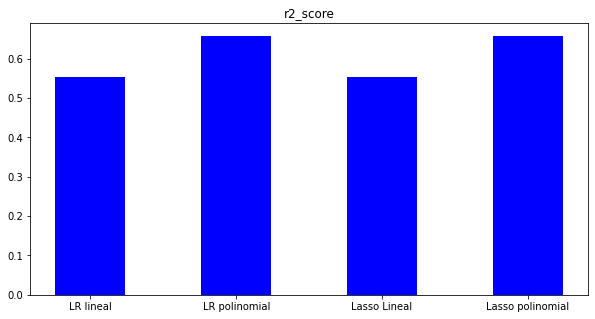

In [ ]:
r2_value = list()
for modelo in modelos:
  r2_value.append(resultados[modelo][2])
  print('r2_sccore de ',modelo," ",resultados[modelo][2])

plt.figure(figsize = (10, 5))
plt.bar(modelos, r2_value, color ='blue', width = 0.48)
plt.title("r2_score")


Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

R=  la partición de datos que se utilizó fue de 20% para test y un 80% para entrenamiento; esta partición es  buena para evitar un sobreentrenamiento y tener mejores resultados, así también fue lo que utilicè de acuerdo a la cantidad de datos que tenemos disponible.

El método que más le conviene a la empresa, es regresión lineal, ya que:
-es simple de implementar y eficiente de entrenar

en lo que pude observar en los modelos de regresión, el que obtuvo menor error en MAE y RMSE fue el de grado polinomial, ya que conforme aumentamos el grado de polinomio, los errores crecian, por tanto el mejor fue de grado 2.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


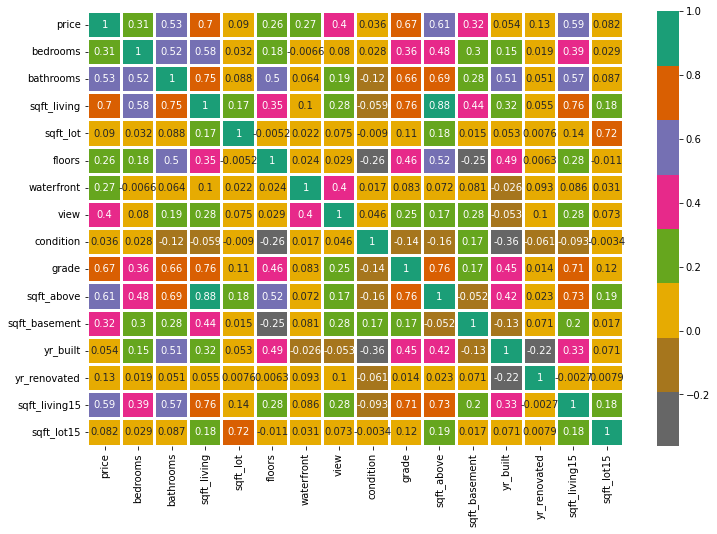

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
# Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


Regresión Múltiple Lineal.
Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

In [ ]:
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
y_pred=modelo.predict(X_test)
#Generamos una lista para guardar los errores y R2
resultados={}
resultados['LR lineal']=[mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]
print('Error Medio Absoluto (MAE):', resultados['LR lineal'][0])
print('Root Mean Squared Error(RMSE):', resultados['LR lineal'][1])
print('r2_score:',resultados ['LR lineal'][2])



Error Medio Absoluto (MAE): 137480.13882733323
Root Mean Squared Error(RMSE): 232133.3676240722
r2_score: 0.6579723205007892


In [ ]:
#Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

modelo.fit(X_poly, y_train)

print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [[ 9.33879687e+05 -1.09273860e+06 -5.37390428e+02 -2.78634102e+01
  -2.07489950e+06 -3.95371495e+06 -2.88652531e+05  5.58519576e+05
   1.09862983e+06 -1.38818478e+02 -3.01577501e+02 -8.59702783e+04
  -2.95366775e+03  3.99963414e+03 -3.40100355e+01  9.57586804e+02
   7.49940820e+03 -1.40076562e+01 -1.85239669e-02  8.58010319e+03
  -1.14952153e+04 -3.08060610e+02 -5.24565914e+03 -5.36863409e+03
  -9.99978948e-01 -1.43956003e+01 -4.67077597e+02 -9.13138297e+00
   1.72800783e+01  2.15615872e-01 -9.63204388e+03  1.52795786e+01
  -1.35647630e-01 -2.59102127e+04  4.33756643e+04  3.82989181e+03
  -1.08068921e+03  2.22968388e+04  1.45391755e+01  1.44644985e+00
   5.03114428e+02 -1.70846902e+01 -1.72874570e+01 -5.60714143e-02
  -4.03248131e+00 -5.41426547e+00  4.83377617e+00  1.60300670e+02
  -1.42705827e+01  1.31213999e+01  2.07436184e+01  5.09311380e+00
   2.80584168e+00  6.59334209e-01 -1.80580810e-01 -9.38519281e-01
   6.96385656e+00  3.06405127e-07  4.40874362e-01 -9.83935453e

In [ ]:
X_polytest = poly_features.fit_transform(X_test)
y_pred=modelo.predict(X_polytest)
resultados['LR polinomial']=[mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]

print('\nError Medio Absoluto (MAE):', resultados['LR polinomial'][0])
print('\nRoot Mean Squared Error(RMSE):', resultados['LR polinomial'][1])
print('\nr2_score:',resultados ['LR polinomial'][2])



Error Medio Absoluto (MAE): 121313.84710967973

Root Mean Squared Error(RMSE): 186261.48278206724

r2_score: 0.7797924413783968


In [ ]:
#2.4. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada
#RIDGE
modelo = Ridge(alpha=1)
modelo.fit(X_train, y_train)
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Y_pred = modelo.predict(X_test)

Model coefs:  [[-3.82192265e+04  4.14509656e+04  1.08013356e+02  1.69318239e-02
   3.16891574e+04  5.48258333e+05  4.14559235e+04  2.12264347e+04
   1.19470568e+05  4.78072834e+01  6.02071561e+01 -3.55050129e+03
   1.33171890e+01  2.89851987e+01 -5.47998512e-01]]
Model intercept: [6150751.38368669]


In [ ]:
resultados['Ridge lineal']=[mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]
print('\nError Medio Absoluto (MAE):', resultados['Ridge lineal'][0])
print('\nRoot Mean Squared Error(RMSE):', resultados['Ridge lineal'][1])
print('\nr2_score:',resultados ['Ridge lineal'][2])



Error Medio Absoluto (MAE): 121313.84710967973

Root Mean Squared Error(RMSE): 186261.48278206724

r2_score: 0.7797924413783968


In [ ]:
#RIDGE POLINOMIAL
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
modelo.fit(X_poly, y_train)

print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)


Model coefs:  [ 6.16471883e+05 -1.00341220e+05  3.64456049e+02 -1.40465061e+01
 -4.06358378e+05 -2.17617745e+06  2.71151449e+05  6.80622524e+05
  5.49319867e+05 -3.53585772e+02 -3.54078550e+02 -1.22092104e+04
 -9.97022723e+02  8.76592222e+02 -1.08194328e+01  1.06918486e+03
  3.46406910e+03 -2.56717202e+01 -1.18760573e-01  8.56598185e+03
 -2.07802079e+04 -5.60810930e+02 -3.30539900e+03 -5.92014103e+03
  1.23172258e+01  1.03123484e+00 -3.08995075e+02 -4.39070636e+00
  1.99326172e+01  2.47773128e-01 -3.95767181e+03  6.01872106e+01
 -1.04001641e-01 -2.16041249e+04  4.72160313e+04  6.05878868e+03
 -1.26867392e+04  2.21143949e+04 -2.74670119e+01 -4.70052497e+01
  2.45435145e+01 -2.59944123e+01 -3.18930326e+01  1.23185405e-01
 -2.02717308e-02  7.54138847e-04 -6.68871018e+00 -2.92152902e+02
  8.23264538e+01 -2.58714483e+01  2.88898567e+01 -6.56181332e-02
 -6.05434947e-02 -6.24758101e-02  5.20834660e-02 -5.61512042e-03
  1.63334647e-03  1.51942000e-07  4.44045795e-01 -1.82003402e-01
 -9.8203962

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.308e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
X_polytest = poly_features.fit_transform(X_test)
y_pred=modelo.predict(X_polytest)
resultados['Ridge polinomial']=[mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]
print('\nError Medio Absoluto (MAE):', resultados['Ridge polinomial'][0])
print('\nRoot Mean Squared Error(RMSE):', resultados['Ridge polinomial'][1])
print('\n r2_score:',resultados ['Ridge polinomial'][2])



Error Medio Absoluto (MAE): 121523.32193129537

Root Mean Squared Error(RMSE): 186989.38830231735

 r2_score: 0.778067946324558


In [ ]:
#LASSO
modelo = Lasso(alpha=0.01, max_iter=8000)
modelo.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.01, max_iter=8000)

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)


Model coefs:  [-3.82007921e+04  4.14660952e+04  2.93481980e+02  1.71356245e-02
  3.16916458e+04  5.52689524e+05  4.12493792e+04  2.12221167e+04
  1.19493202e+05 -1.37714322e+02 -1.25271820e+02 -3.55090164e+03
  1.32602477e+01  2.90059224e+01 -5.48132637e-01]
Model intercept: [6151358.47125266]


In [ ]:
y_pred=modelo.predict(X_test)
resultados['Lasso lineal']=[mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]
print('\nError Medio Absoluto (MAE):', resultados['Lasso lineal'][0])
print('\nRoot Mean Squared Error(RMSE):', resultados['Lasso lineal'][1])
print('\nr2_score:',resultados ['Lasso lineal'][2])
 


Error Medio Absoluto (MAE): 137480.14315454193

Root Mean Squared Error(RMSE): 232133.3792204406

r2_score: 0.6579722863283727


In [ ]:
#LASSO POLINOMIAL
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
modelo.fit(X_poly, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.308e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.01, max_iter=8000)

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)


Model coefs:  [ 6.16471883e+05 -1.00341220e+05  3.64456049e+02 -1.40465061e+01
 -4.06358378e+05 -2.17617745e+06  2.71151449e+05  6.80622524e+05
  5.49319867e+05 -3.53585772e+02 -3.54078550e+02 -1.22092104e+04
 -9.97022723e+02  8.76592222e+02 -1.08194328e+01  1.06918486e+03
  3.46406910e+03 -2.56717202e+01 -1.18760573e-01  8.56598185e+03
 -2.07802079e+04 -5.60810930e+02 -3.30539900e+03 -5.92014103e+03
  1.23172258e+01  1.03123484e+00 -3.08995075e+02 -4.39070636e+00
  1.99326172e+01  2.47773128e-01 -3.95767181e+03  6.01872106e+01
 -1.04001641e-01 -2.16041249e+04  4.72160313e+04  6.05878868e+03
 -1.26867392e+04  2.21143949e+04 -2.74670119e+01 -4.70052497e+01
  2.45435145e+01 -2.59944123e+01 -3.18930326e+01  1.23185405e-01
 -2.02717308e-02  7.54138847e-04 -6.68871018e+00 -2.92152902e+02
  8.23264538e+01 -2.58714483e+01  2.88898567e+01 -6.56181332e-02
 -6.05434947e-02 -6.24758101e-02  5.20834660e-02 -5.61512042e-03
  1.63334647e-03  1.51942000e-07  4.44045795e-01 -1.82003402e-01
 -9.8203962

In [ ]:
X_polytest = poly_features.fit_transform(X_test)
y_pred=modelo.predict(X_polytest)
resultados['Lasso polinomial']=[mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]
print('\nError Medio Absoluto (MAE):', resultados['Lasso polinomial'][0])
print('\nRoot Mean Squared Error(RMSE):', resultados['Lasso polinomial'][1])
print('\nr2_score:',resultados ['Lasso polinomial'][2])



Error Medio Absoluto (MAE): 121523.32193129537

Root Mean Squared Error(RMSE): 186989.38830231735

r2_score: 0.778067946324558


In [ ]:
#revisamos resultaods:
resultados

{'LR lineal': [137480.13882733323, 232133.3676240722, 0.6579723205007892],
 'LR polinomial': [121313.84710967973, 186261.48278206724, 0.7797924413783968],
 'Ridge lineal': [121313.84710967973, 186261.48278206724, 0.7797924413783968],
 'Lasso lineal': [137480.14315454193, 232133.3792204406, 0.6579722863283727],
 'Ridge polinomial': [121523.32193129537,
  186989.38830231735,
  0.778067946324558],
 'Lasso polinomial': [121523.32193129537,
  186989.38830231735,
  0.778067946324558]}

In [ ]:
modelos=resultados.keys()
modelos


dict_keys(['LR lineal', 'LR polinomial', 'Ridge lineal', 'Lasso lineal'])

MAE de  LR lineal   137480.13882733323
MAE de  LR polinomial   121313.84710967973
MAE de  Ridge lineal   121313.84710967973
MAE de  Lasso lineal   137480.14315454193
MAE de  Ridge polinomial   121523.32193129537
MAE de  Lasso polinomial   121523.32193129537


Text(0.5, 1.0, 'MAE')

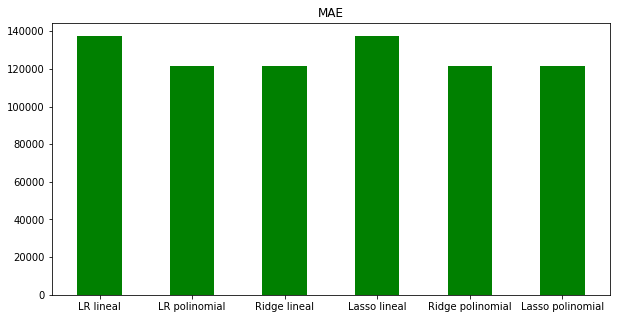

In [ ]:
#2.5. grafica : MAE (de los cuatro métodos) , R2 (de los cuatro métodos)
mae_value = list()
for modelo in modelos:
  mae_value.append(resultados[modelo][0])
  print('MAE de ',modelo," ",resultados[modelo][0])

plt.figure(figsize = (10, 5))
plt.bar(modelos, mae_value, color ='green', width = 0.48)
plt.title("MAE")

RMSE de  LR lineal   232133.3676240722
RMSE de  LR polinomial   186261.48278206724
RMSE de  Ridge lineal   186261.48278206724
RMSE de  Lasso lineal   232133.3792204406
RMSE de  Ridge polinomial   186989.38830231735
RMSE de  Lasso polinomial   186989.38830231735


Text(0.5, 1.0, 'RMSE')

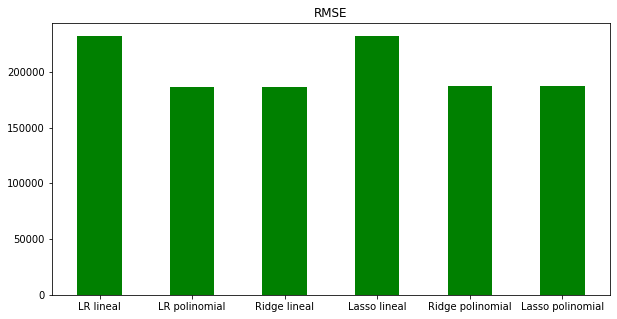

In [ ]:
rmse_value = list()
for modelo in modelos:
  rmse_value.append(resultados[modelo][1])
  print('RMSE de ',modelo," ",resultados[modelo][1])

plt.figure(figsize = (10, 5))
plt.bar(modelos, rmse_value, color ='green', width = 0.48)
plt.title("RMSE")

r2_sccore de  LR lineal   0.6579723205007892
r2_sccore de  LR polinomial   0.7797924413783968
r2_sccore de  Ridge lineal   0.7797924413783968
r2_sccore de  Lasso lineal   0.6579722863283727
r2_sccore de  Ridge polinomial   0.778067946324558
r2_sccore de  Lasso polinomial   0.778067946324558


Text(0.5, 1.0, 'r2_score')

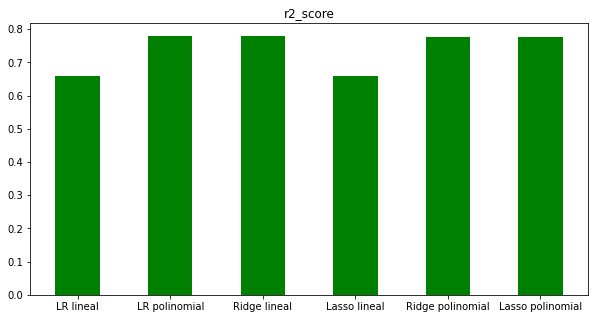

In [ ]:
r2_value = list()
for modelo in modelos:
  r2_value.append(resultados[modelo][2])
  print('r2_sccore de ',modelo," ",resultados[modelo][2])

plt.figure(figsize = (10, 5))
plt.bar(modelos, r2_value, color ='green', width = 0.48)
plt.title("r2_score")

2.6.Explica tus resultados, que método se aproxima mejor, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

Agrega las conclusiones


que método se aproxima mejor = polinomial, porquè?, porcentajes de entranimeinto y evaluaciòn usaste?: 
R: En esta ocasión se realizó train y test de 10 y 90% respectivamente, y vemos que el modelo polinomial, ya que sigue con menos error en las predicciones y MAE.

qué error tienen, es bueno?, cómo lo sabes?
R: hay una diferencia entre predicciones y datos eseprados, gracias al MAE que fue que nos indicó esto, dado el tamaño de datos que tenemos, hubo buen rendimiento en general de todos los modelos.

Referencias:

Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".